In [1]:
import random
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from scipy.optimize import curve_fit
rg = np.random.default_rng(1234)
from scipy.stats import skew

### Understanding the treatment of uncertainties for Exercise 1

Let us concentrate on a given value of $p_{Inf}$ and take the variable that describes if the disease has transmitted to country B, we call it $r$ and it can take discrete values:
* $r=1$ if the disease has transmitted to country B     (at least one infected over 100 days)
* $r=0$ if the disease has not transmitted to country B (no infected over 100 days)

Let us assume (with reason) that the outcome of our simulation follows the Bernoulli distribution (see lecture 3):

<img src="bernoulli.png" alt="Drawing" style="width: 200px;"/>

where $p$ is the true value of the probability of transmission to country B (which we previously defined *fraction*)
and $q=1-p$. 

Example: $p = 0.05$, we perform 100 experiments and we get the following outcomes:

In [2]:
bern = rg.binomial(n=1, p=0.05, size=100)
print(bern)

[1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


(array([93.,  7.]), array([-0.5,  0.5,  1.5]), <a list of 2 Patch objects>)

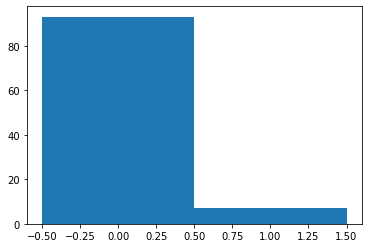

In [3]:
fig,ax = plt.subplots()
ax.hist(bern, bins=[-0.5,0.5,1.5])

We estimate the mean and variance of the distribution.
For a Bernoulli distribution we expect: 

$\mu=p$, $V=p(1-p)$

In this case, we only took 100 samples, so we can expect that the mean and variance of our dataset will only approximate the true mean and variance.

(Note that taking the mean equals calculating the fraction of successes)

In [4]:
print('Mean={:.2f} Var={:.2f}'.format(bern.mean(), bern.var()))

Mean=0.07 Var=0.07


If we take 500 samples, we can expect a better convergence to the true values

In [5]:
bern500 = rg.binomial(n=1, p=0.05, size=500)
print('Mean={:.2f} Var={:.2f}'.format(bern500.mean(), bern500.var()))

Mean=0.04 Var=0.03


Now, given $n$ Bernoulli trials with success probability $p$, the binomial distribution gives the
probability to observe $r$ successes and $n-r$ failures (independently of the order)

<img src="binomial.png" alt="Drawing" style="width: 200px;"/>

Please note that, in this case, the variable $r$ has a different meaning than before. It describes how many experiments will give me success (transmission of virus to Country B)

Essentially, we can use the Binomial distribution (divided by 500) as the true probability distribution of our "fraction" variable over the 500 experiments, with: 
$p=p_{inf}$, $n=500$

E.g. we take 10 samples from this distirbution (i.e. 10 possible outcomes of our experiment with 500 trials for one value of $p_{Inf}$)

In [6]:
rg.binomial(n=500, p=0.05, size=10)/500.  

array([0.07 , 0.062, 0.05 , 0.048, 0.046, 0.072, 0.048, 0.054, 0.038,
       0.038])

How justified is it that we take the mean and standard deviation of this dataset and use it for Gaussian error propagation later on? 

Fairly justified: the distribution of the possible outcomes of our experiment with 500 trials is almost Gaussian.

(In fact we know that the binomial distribution tends to the Gaussian in the limit for $n=\infty$

In [7]:
trials100  = rg.binomial(n=100, p=0.05, size=10000)/100.   # 10K samples of the binomial distribution with 100 trials
trials500  = rg.binomial(n=500, p=0.05, size=10000)/500.   # 10K samples of the binomial distribution with 500 trials
trials5000 = rg.binomial(n=5000, p=0.05, size=10000)/5000.  # 10K samples of the binomial distribution with 5000 trials

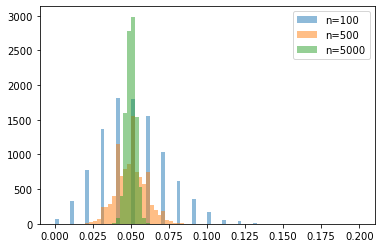

In [8]:
fig,ax = plt.subplots()
ax.hist(trials100, bins=80,  range=(0., 0.2), alpha=0.5, label='n=100')
ax.hist(trials500, bins=80,  range=(0., 0.2), alpha=0.5, label='n=500')
ax.hist(trials5000, bins=80, range=(0., 0.2), alpha=0.5, label='n=5000')
ax.legend(loc='upper right')

In [9]:
print('n=100,  mean={:.3f} sigma={:.3f} skewness={:.2f}'.format(trials100.mean(), np.sqrt(trials100.var()), skew(trials100)))
print('n=500,  mean={:.3f} sigma={:.3f} skewness={:.2f}'.format(trials500.mean(), np.sqrt(trials500.var()), skew(trials500)))
print('n=5000, mean={:.3f} sigma={:.3f} skewness={:.2f}'.format(trials5000.mean(), np.sqrt(trials5000.var()), skew(trials5000)))

n=100,  mean=0.050 sigma=0.022 skewness=0.42
n=500,  mean=0.050 sigma=0.010 skewness=0.17
n=5000, mean=0.050 sigma=0.003 skewness=0.03


The higher the $n$ the smaller the variance and, especially, the skewness, which is zero for a perfect Gaussian.

Ok, we have justified that over 500 experiments the Bernoulli distribution is fairly similar to a Gaussian. 
Therefore, when we perform exercise 1., for each value of $p_{Inf}$ we perform a few runs of 500 experiments,  calculate a mean and a standard deviation and quote these as the uncertainty on our measurements. 

Afaik, this guarantees that errors on fitted parameters of the least square solution are also normally distributed.

In turn this means that one can use standard propagation of errors to calculate uncertainty on p* starting from uncertainties of the fitted parameters.


In [10]:
# Example measurements (taken from having run 500 sim each point)

x = np.array([0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.25])

y1 = np.array([0.002, 0.008, 0.014, 0.022, 0.038, 0.058, 0.064, 0.116, 0.132,
       0.216])
y2 = np.array([0.008, 0.006, 0.022, 0.038, 0.028, 0.068, 0.072, 0.092, 0.156,
       0.174])
y3 = np.array([0.006, 0.002, 0.004, 0.024, 0.05 , 0.066, 0.082, 0.114, 0.15 ,
       0.196])
y4 = np.array([0.006, 0.008, 0.012, 0.024, 0.03 , 0.054, 0.062, 0.124, 0.152,
       0.204])
y5 = np.array([0.004, 0.006, 0.02 , 0.022, 0.038, 0.064, 0.078, 0.112, 0.14 ,
       0.25 ])
y6 = np.array([0.006, 0.006, 0.01 , 0.028, 0.046, 0.044, 0.086, 0.106, 0.144,
       0.208])
yall = np.vstack((y1,y2,y3,y4,y5,y6))

In [11]:
y = yall.mean(axis=0)
yerr = np.sqrt(yall.var(axis=0))
y,yerr/y

(array([0.00533333, 0.006     , 0.01366667, 0.02633333, 0.03833333,
        0.059     , 0.074     , 0.11066667, 0.14566667, 0.208     ]),
 array([0.35355339, 0.33333333, 0.44239895, 0.21219056, 0.20522476,
        0.13942331, 0.11985707, 0.08955463, 0.05515776, 0.11005311]))

In [12]:
# Functions to try the fit to
def poly1(x,a,b):
  return a + b*x

def poly3(x,a,b,c,d):
  return a + b*x + c*x**2 + d*x**3

def poly2(x,a,b,c):
  return a + b*x + c*x**2

def expon(x,a,b):
  return a * np.exp(b*x)

def Logistic(x,x0,L,k):
  return L/(1+np.exp(k*(x-x0)))

In [17]:
def fitRoutine(f,x,y,yerr=None):
  
  if yerr is not None:
    popt,pcov = curve_fit(f, x, y, sigma=yerr, absolute_sigma=True) # important to have absolute_sigma=True
  
  else:
    popt,pcov = curve_fit(f, x, y) 

  print('\nFitted parameters')
  for i,ip in enumerate(popt):
    print('i={} fitted param:\t{:.2f}\t+/-\t{:.2f}'.format(i,popt[i], pcov[i,i]**0.5))

  #print('Extracted covariance matrix:')
  #print(pcov)
  if yerr is not None: 
    chisq = (((y - f(x, *popt) ) / yerr)**2).sum()
    red_chisq = chisq / (len(x)-len(popt)) # ndof = number of meas - n of fitted params
    print('\nvalue of Chisquare          {:.3f}'.format(chisq))
    print('value of reduced Chisquare  {:.3f}'.format(red_chisq))
  
  return popt,pcov

In [18]:
popt_2,pcov_2 = fitRoutine(poly2,x,y,yerr)
popt_3,pcov_3 = fitRoutine(poly3,x,y,yerr)
popt_exp,pcov_exp = fitRoutine(expon,x,y,yerr)
popt_log,pcov_log = fitRoutine(Logistic,x,y,yerr)


Fitted parameters
i=0 fitted param:	0.50	+/-	0.09
i=1 fitted param:	-6.61	+/-	0.97
i=2 fitted param:	21.89	+/-	2.63

value of Chisquare          1.683
value of reduced Chisquare  0.240

Fitted parameters
i=0 fitted param:	0.68	+/-	0.60
i=1 fitted param:	-9.49	+/-	9.82
i=2 fitted param:	37.50	+/-	52.97
i=3 fitted param:	-27.79	+/-	94.19

value of Chisquare          1.596
value of reduced Chisquare  0.266

Fitted parameters
i=0 fitted param:	0.00	+/-	0.00
i=1 fitted param:	35.65	+/-	1.52

value of Chisquare          25.635
value of reduced Chisquare  3.204

Fitted parameters
i=0 fitted param:	0.23	+/-	0.01
i=1 fitted param:	0.26	+/-	0.05
i=2 fitted param:	-52.80	+/-	4.93

value of Chisquare          2.829
value of reduced Chisquare  0.404


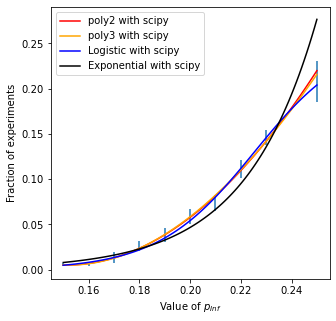

In [19]:
bigx = np.linspace(0.15, 0.25, 100)

fig,ax = plt.subplots(1,1,figsize=(5, 5))

ax.errorbar(x, y, yerr, fmt="none")

ax.plot(bigx,poly2(bigx,*popt_2),label='poly2 with scipy', color='red')

ax.plot(bigx,poly3(bigx,*popt_3), label='poly3 with scipy', color='orange')

ax.plot(bigx,Logistic(bigx,*popt_log), label='Logistic with scipy', color='blue')

ax.plot(bigx,expon(bigx,*popt_exp), label='Exponential with scipy', color='black')

ax.legend(loc='upper left', frameon=True)

ax.set_xlabel('Value of $p_{Inf}$')
ax.set_ylabel('Fraction of experiments')
ax.set_title('')
plt.show()

#### Extract p* and uncertainty (treatment for poly2)


In [20]:
def poly2_inv(y,a,b,c):
  return (-b + np.sqrt(b**2 - 4*c*(a-y)) ) / (2. * c)

In [21]:
pstar=poly2_inv(0.05,*popt_2)
print('Extracted value of p*={:.3f}'.format(pstar)) 

Extracted value of p*=0.196


For uncertainty calculation, I use the general formula for correlated variables
(from [wikipedia](https://en.wikipedia.org/wiki/Propagation_of_uncertainty))

<img src="uncer_prop_withCorr.png" alt="Drawing" style="width: 800px;"/>


So I need to calculate the partial derivatives of the inverse function (I do this analytically)

In [22]:
def getVec(y,a,b,c):

  sq = np.sqrt(b**2 - 4 * c * (a-y))

  dinv_da = -1. / sq # ok
  
  dinv_db = 1./(2*c) * (-1 + b / sq) # ok 
  
  dinv_dc = -(a-y)/c * 1/sq - 1/(2*c**2)*(-b + sq) # ok

  vec = np.array([dinv_da,dinv_db,dinv_dc]) #.reshape(1,-1)
  #jac = vec * vec.T
  
  return vec

In [23]:
vec = getVec(0.05,*popt_2)
var_pstar = pcov_2.dot(vec).dot(vec.T)

print('Extracted value of p*={:.3f} +/-{:.3f}'.format(pstar,np.sqrt(var_pstar))) 

Extracted value of p*=0.196 +/-0.002


In [ ]:
popt_ian = np.array([0.42, -5.73, 19.64 ])
pcov_ian = np.array([[0.0048,-0.051,0.1333],[-0.051,0.54731,-1.4347],[0.1333,-1.4347,3.7755]])
pcov_ian         

In [ ]:
pstar_ian = poly2_inv(0.05,*popt_ian)
pstar_ian # inverted a with c... 
vec_ian = getVec(0.05,*popt_ian)
var_pstar_ian = pcov_ian.dot(vec_ian).dot(vec_ian.T)
print('Extracted value of p*={:.3f} +/-{:.3f}'.format(pstar_ian,np.sqrt(var_pstar_ian))) 